In [1284]:
### Simple Neural Network for Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Sections: Training, and Evaluation

In [1285]:
## Data Loading

# Setting parameters for data
num_epochs = 10
num_neurons = 784
neuron_per_layer = 64
batch_size_train = 100
batch_size_test = 100
learning_rate = 0.01
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [1286]:
# Load the data
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_loader = DataLoader(training_data, batch_size_train)
test_loader = DataLoader(test_data, batch_size_test)

In [1287]:
# Split data into separate sets
x_train, y_train = next(iter(train_loader))
x_test, y_test = next(iter(test_loader))

x_train[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

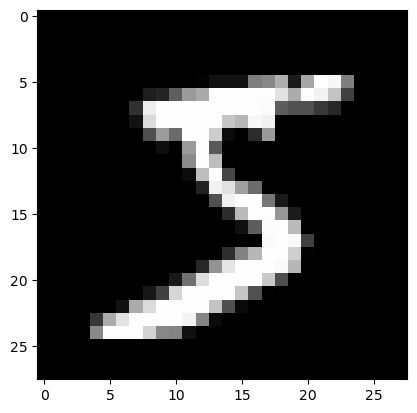

In [1288]:
plt.imshow(x_train[0].squeeze(), cmap='gray')

In [1289]:
y_train[0]

tensor(5)

In [1290]:
# Flatten images into 784-dimensional vector
x_train = x_train.reshape(batch_size_train, num_neurons)
x_test = x_test.reshape(batch_size_test, num_neurons)

In [1291]:
x_train[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [1292]:
# Normalize pixel values from 0 to 1
x_train = x_train / 255
x_test = x_test / 255

In [1293]:
x_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [1294]:
# One-hot encode the labels
from numpy import array
import torch.nn.functional as F

ytrain_one_hot = F.one_hot(y_train, num_classes=10)
ytest_one_hot = F.one_hot(y_test, num_classes=10)


print(ytrain_one_hot)

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],


In [1295]:
## Model Definition
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.input = nn.Linear(784, 128)
        self.h1 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = self.input(x)
        x = F.relu(self.h1(x))
        x = self.output(x)
        return F.log_softmax(x, dim=0)

In [1296]:
network = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

In [1297]:
## Training

def train(epoch):
    network.eval()
    total_loss, total_correct = 0, 0
    for i, x in enumerate(x_train):
        output = network.forward(x)
        loss = criterion(output, ytrain_one_hot[i].float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * len(x_train)
        total_correct += (output.argmax() == ytest_one_hot[i].float()).sum().item()

    print(f'Epoch [{epoch + 1} / {num_epochs}]')
    print(f'Total Loss [{total_loss} / {len(train_loader.dataset)}], Accuracy: {100. * round(total_correct / len(train_loader.dataset), 4)}%')

def validate():
    network.eval()
    total_loss, total_correct = 0, 0
    with torch.no_grad():
        for x, y in test_loader:
            output = network.forward(x_test)
            loss = criterion(output, ytest_one_hot.float())
            loss.requires_grad = True

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * len(x)
            total_correct += (output.argmax() == y).sum().item()

        print(f'Total Loss [{total_loss} / {len(test_loader.dataset)}], Accuracy: {100. * round(total_correct / len(test_loader.dataset), 4)}%')

In [1298]:
validate()

Total Loss [23025.93469619751 / 10000], Accuracy: 0.0%


In [1299]:
for epoch in range(num_epochs):
    train(epoch)

Epoch [1 / 10]
Total Loss [23200.285947322845 / 60000], Accuracy: 0.16%
Epoch [2 / 10]
Total Loss [21443.28804059187 / 60000], Accuracy: 0.5%
Epoch [3 / 10]
Total Loss [20022.415871282974 / 60000], Accuracy: 0.36%
Epoch [4 / 10]
Total Loss [17874.656130701715 / 60000], Accuracy: 0.3%
Epoch [5 / 10]
Total Loss [14810.073095710773 / 60000], Accuracy: 0.26%
Epoch [6 / 10]
Total Loss [10263.868023009854 / 60000], Accuracy: 0.22%
Epoch [7 / 10]
Total Loss [7099.1446722046 / 60000], Accuracy: 0.21%
Epoch [8 / 10]
Total Loss [8694.549175670682 / 60000], Accuracy: 0.24%
Epoch [9 / 10]
Total Loss [6317.55912594262 / 60000], Accuracy: 0.21%
Epoch [10 / 10]
Total Loss [3208.562045109079 / 60000], Accuracy: 0.22%
